In [ ]:
#15, 22 марта

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import random

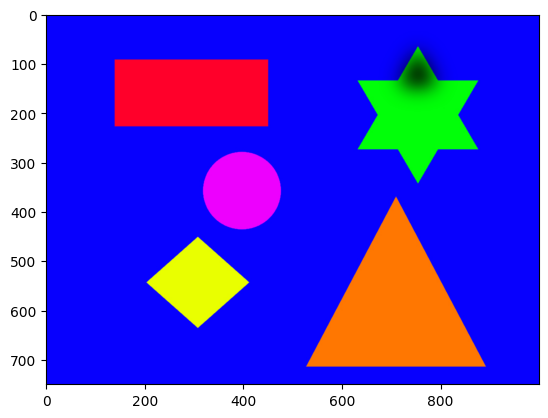

In [ ]:
img = Image.open('image4.jpg')
plt.imshow(img)

In [ ]:
maximum = list(np.array(img)[200, 800])
maximum

[1, 255, 9]

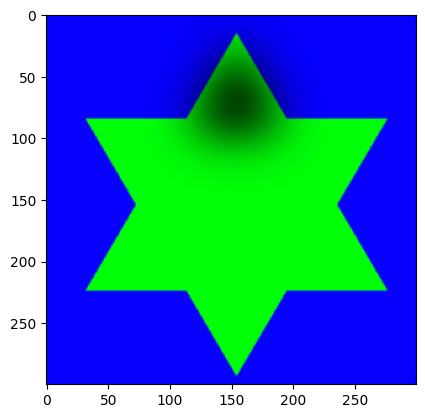

In [ ]:
cropped = img.crop((600, 50, 900, 350))
plt.imshow(cropped)

In [ ]:
cropped2 = cropped.crop((140, 50, 170, 85))
cropped2.size

(30, 35)

In [ ]:
pix_cropped = cropped2.load()

In [ ]:
data1 = [(x, y, pix_cropped[x, y][0], pix_cropped[x, y][1], pix_cropped[x, y][2]) \
        for x in range(cropped2.size[0]) for y in range(cropped2.size[1])]

In [ ]:
minimum, maximum = (255, 255, 255), (0, 0, 0)
for point in data1:
    if point[2:5] < minimum: minimum = point[2:5]
    # if point[2:5] > maximum: maximum = point[2:5]
minimum = list(minimum) #, maximum

In [ ]:
minimum

[0, 68, 1]

In [ ]:
clustImg = img.copy()
pix_clustImg = clustImg.load()
data = [(x, y, pix_clustImg[x, y][0], pix_clustImg[x, y][1], pix_clustImg[x, y][2]) \
        for x in range(img.size[0]) for y in range(img.size[1])]
db=KMeans(14)
db_clusters=db.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


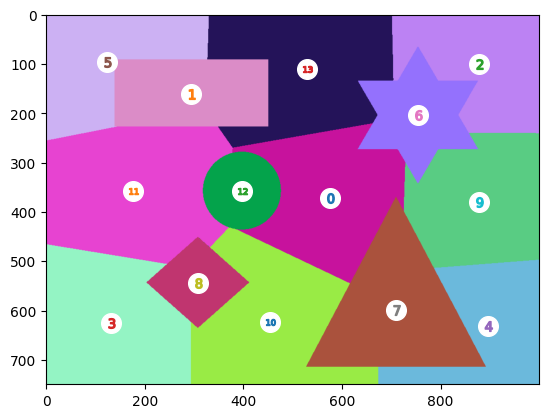

In [ ]:
colors = [(int(255*random.random()), int(255*random.random()), int(255*random.random())) \
          for i in range(max(db_clusters)+1)]

for point, numClust in zip(data, db_clusters):
    pix_clustImg[point[0], point[1]] = colors[numClust]

ax = plt.subplot()

ax.scatter(db.cluster_centers_[:, 0], db.cluster_centers_[:, 1], \
           marker='o', c='white', alpha=1, s=200)
for i, c in enumerate(db.cluster_centers_):
    ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

ax.imshow(clustImg)

In [ ]:
obj_color = tuple(np.array(img)[200, 800])
# obj_color = [minimum, maximum]
# obj_color = list(map(sum, obj_color))
# obj_color

[69, 265]

23.0

In [ ]:
objClust = None
for numClust, point in enumerate(db.cluster_centers_):
    x, y = map(int, (point[0], point[1]))
    RGB_point = pix_clustImg[x, y]
    if RGB_point == obj_color:
      objClust = numClust

In [ ]:
obj_img = img.copy()
for k, v in dict(zip(data, db.labels_)).items():
    if v != 6:
        color = (k[2] + k[3] + k[4]) // 3
        obj_img.putpixel((k[0], k[1]), (color, color, color))

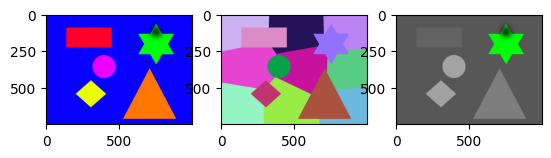

In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img)
ax[1].imshow(clustImg)
ax[2].imshow(obj_img)

In [ ]:
def func(img, n_clusters):
    clustImg = img.copy()
    pix_clustImg = clustImg.load()
    data = [(x, y, pix_clustImg[x, y][0], pix_clustImg[x, y][1], pix_clustImg[x, y][2]) \
            for x in range(img.size[0]) for y in range(img.size[1])]
    db=KMeans(n_clusters)
    db_clusters=db.fit_predict(data)

    colors = [(int(255*random.random()), int(255*random.random()), int(255*random.random())) \
          for i in range(max(db_clusters)+1)]
    for point, numClust in zip(data, db_clusters):
        pix_clustImg[point[0], point[1]] = colors[numClust]
    ax = plt.subplot()
    ax.scatter(db.cluster_centers_[:, 0], db.cluster_centers_[:, 1], \
            marker='o', c='white', alpha=1, s=200)
    for i, c in enumerate(db.cluster_centers_):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    ax.imshow(clustImg)
    plt.show()

    objClust = list(map(int, input('Enter cluster number(s): ').split()))

    obj_img = img.copy()
    for k, v in dict(zip(data, db.labels_)).items():
        if v not in objClust:
            color = (k[2] + k[3] + k[4]) // 3
            obj_img.putpixel((k[0], k[1]), (color, color, color))

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img)
    ax[1].imshow(obj_img)

In [ ]:
img2 = Image.open('image2.jpg')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


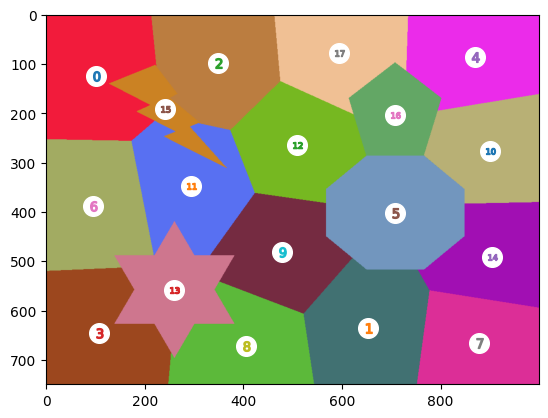

Enter cluster number(s): 16 5


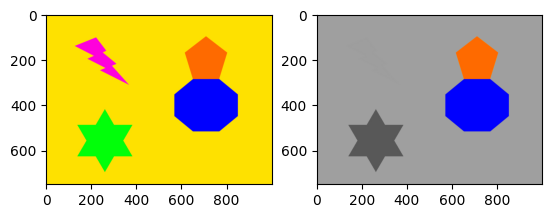

In [ ]:
func(img2 , 18)

In [ ]:
# img3 = Image.open('image3.jpg')
# func(img3, 28)